# Getting started with PhenoScore
In this notebook, we will run some basic analyses using PhenoScore to demonstrate how it works.
First, lets get started and import the installed package (for instructions, please see the README.md)

In [1]:
from phenoscore.phenoscorer import PhenoScorer
import os

2023-02-16 08:50:59,608 - phenopy - INFO - checking if config file exists: C:\ProgramData\Anaconda3\envs\PhenoScore\.phenopy
2023-02-16 08:50:59,610 - phenopy - INFO - phenopy 0.5.2
2023-02-16 08:50:59,611 - phenopy - INFO - Using configuration file: C:\ProgramData\Anaconda3\envs\PhenoScore\.phenopy\phenopy.ini


Then, decided on what mode you want to run PhenoScore in: HPO-only, facial-features only, or using both. 
For now, we will do both and intialize PhenoScore with the standard options. PhenoScore will autodetect any GPUs that are available and if there are none, revert to CPU mode. If there are no GPUs detected, while there should be, please double check your installation and confirm cuDNN is installed in this environment as well.

In [2]:
mode = 'both'
N_LIME = 1 #this is purely for speed during testing purposes: for same results as in paper, set N_LIME=5

phenoscorer = PhenoScorer(gene_name='SATB1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')

Using CPU, since no GPUs are found!


Now that PhenoScore is ready, let's load data. In this case, let's take a look at the SATB1 subgroup analyses: the data is included in the package.

In [9]:
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('../', 'phenoscore', 'sample_data','satb1_data.xlsx'))
print('Data loaded!')

Data loaded!
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


Now that the data is loaded, we can run the permutation test, to see if we can distinguish the two groups.

In [ ]:
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))

The result is significant! So PhenoScore is able to detect a phenotypic difference between the two groups. Of course, we would like to know what the clinical difference is. So let's investigate this, using LIME. 

In [ ]:
phenoscorer.get_lime(X, y, img_paths, n_lime=N_LIME)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure.pdf')
print("LIME images generated!")

Finally, we can generate a VUS prediction for a SATB1 individual (as if it where an individual with a VUS, of course in this case, purely for demonstrational purposes). Because of the purpose, we choose lime_iter=10 (normally we would do lime_iter=100 to obtain a higher resolution heatmap).

Predictive score between 0 (control) and 1 (syndrome): [0.92962509]
Figure saved as individual_lime_explanations.pdf


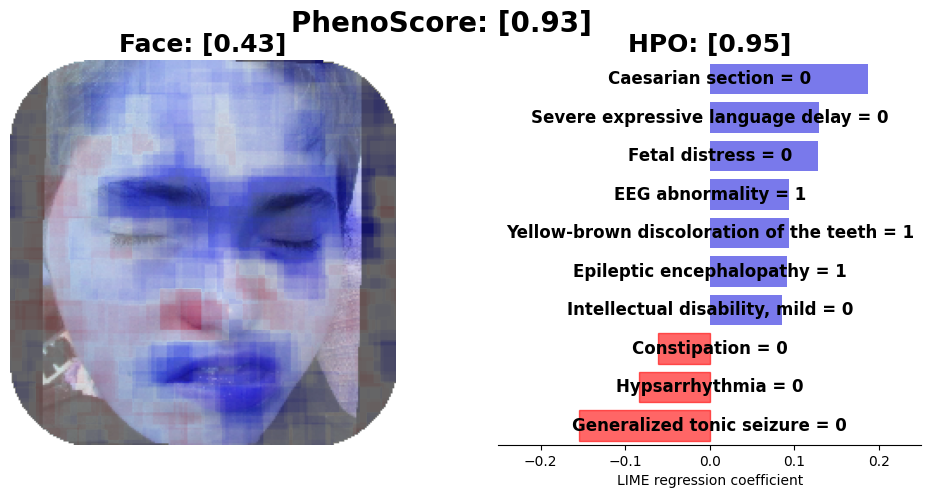

In [10]:
phenoscorer.predict_new_sample(X, y, img_paths[-1], X[-1,-1], lime_iter=10)
print("Predictive score between 0 (control) and 1 (syndrome): " + str(phenoscorer.vus_results[0]))
phenoscorer.gen_vus_figure(filename='individual_lime_explanations.pdf')

We can do the same procedures for HPO-only mode as well, simply by just changing that parameter.

In [13]:
import numpy as np
np.mean(phenoscorer.vus_results[0])

0.9296250867949616

In [ ]:
mode = 'hpo'
phenoscorer = PhenoScorer(gene_name='SATB1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('../', 'phenoscore', 'sample_data','satb1_data.xlsx'))
print('Data loaded!')
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))
phenoscorer.get_lime(X, y, img_paths, n_lime=N_LIME)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure.pdf')
print("LIME images generated!")

And similar when only using facial images (or when these are the only ones available):

In [ ]:
mode = 'face'
phenoscorer = PhenoScorer(gene_name='SATB1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('../', 'phenoscore', 'sample_data','satb1_data.xlsx'))
print('Data loaded!')
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))
phenoscorer.get_lime(X, y, img_paths, n_lime=N_LIME)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure.pdf')
print("LIME images generated!")